In [2]:
%config Completer.use_jedi = False

In [3]:
# Loading Packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# loading fashion mnist dataset
fmnist = tf.keras.datasets.fashion_mnist

In [5]:
# loading data in to training and testing dataset
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# finding the shape of the training dataset
train_images.shape

(60000, 28, 28)

In [8]:
# finding the shape of the testing dataset
test_images.shape

(10000, 28, 28)

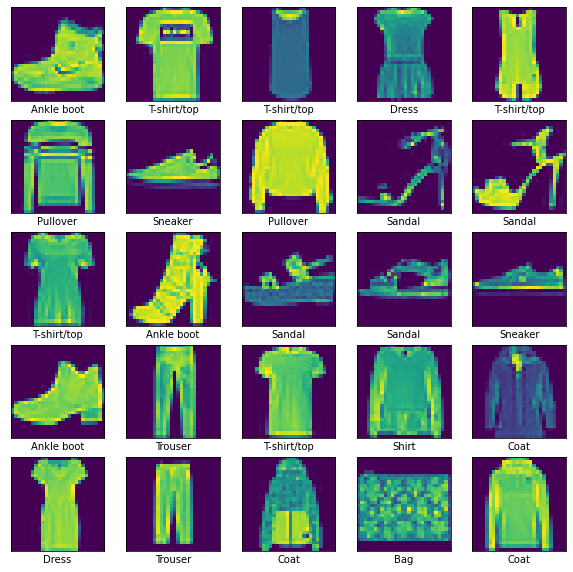

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

In [45]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4583 - accuracy: 0.7401 - val_loss: 0.7879 - val_accuracy: 0.7672
Epoch 2/15
 675/1875 [=========>....................] - ETA: 2s - loss: 0.7195 - accuracy: 0.7807

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:c', round(test_acc*100, 5))

In [ ]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
np.argmax(predictions[1])

In [ ]:
test_labels[1]